# Basics

A simple RC circuit can be modeled as:

$$RC\frac{dv_c}{dt}+v_c=V(t)$$

We can create a slope field and model it's general behavior by putting it in the form $\frac{dv_c}{dt}=f(t,v_c)$

$$\frac{dv_c}{dt}=\frac{V(t)-v_c}{RC}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# We can write this function in order to plot our minitangents where t is the Time, and V is the input voltage(also time dependent)
def voltage_capacitor(vc, V, R, C):
    return (V-vc)/(R*C)

## Zero input

if $V(t)=0$ for all of $t$ the equation above becomes $$\frac{dv_c}{dt}=-\frac{v_c}{RC}$$

we can create our slope field by first creating evenly spaced values for both $v_c$ and $t$. Then using a meshgrid to return a tuple of coordinate matrices from the vectors we create

Then using the function above where $dv_c=function$ and $dt$=shape and type of $dv_c$, and normalizing the values, we can create our slope field.

To normalize, use the euclidean distance between $dv_c$ and $dt$: $$norm=\sqrt{dv_c^2+dt^2}$$

In [3]:
slopev=np.arange(0, 6, 0.3)
slopet=np.arange(0, 6, 0.3)

v, t=np.meshgrid(slopev, slopet)

### Values
The values are as follows: $V(t)=0$, $R=0.5$, $C=1$, $v=v$(from the meshgrid made earlier)

Since we can be analytical with this differential equation, we'll also compare it to the analytical solution whose initial condition $v_c(0)=6$

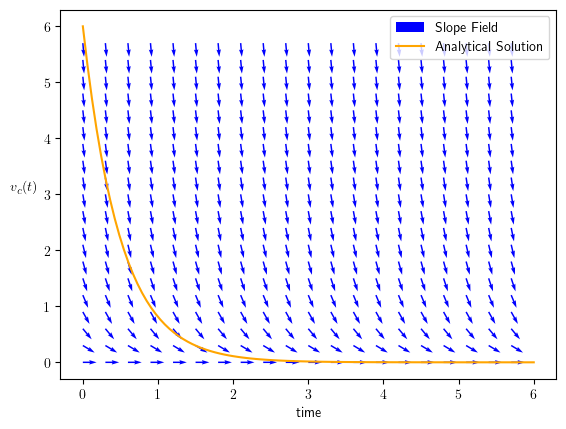

In [4]:
dv=voltage_capacitor(v, 0, 0.5, 1)
dt=np.ones(dv.shape)
norm=np.sqrt(dv**2+dt**2)

time=np.linspace(0,6,100)

def vt(t,R,C):
    return 6*np.exp((-t/(R*C)))

plt.rcParams['text.usetex']=True
plt.quiver(t, v, dt/norm, dv/norm, color='blue', label='Slope Field')
plt.plot(time, vt(time, 0.5, 1), color='orange', label='Analytical Solution')
plt.ylabel(r'$v_c(t)$', rotation=0, ha='right')
plt.xlabel(r'time')
plt.legend()

## Constant Nonzero voltage

if we let $V(t)=K$ for all of $t$ then our equation becomes $$\frac{dv_c}{dt}=\frac{K-v_c}{RC}$$

And our analytical solution for $K=3$ and initial condition $v_c(0)=6$ : $$v_c(t)=K+3e^{\frac{-t}{RC}}$$

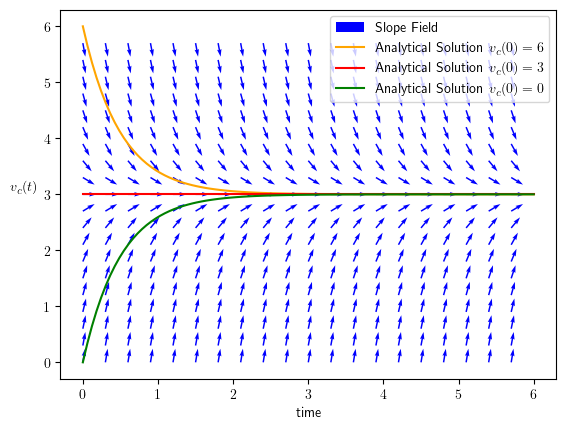

In [5]:
dv=voltage_capacitor(v, 3, 0.5, 1)
dt=np.ones(dv.shape)
norm=np.sqrt(dv**2+dt**2)

#We make the same as equation above, but with an additional variable for multiple solutions
def vt_const(t, k, r, c, const):
    return k-const*np.exp(-(t/(r*c)))

plt.rcParams['text.usetex']=True
plt.quiver(t, v, dt/norm, dv/norm, color='blue', label='Slope Field')
plt.plot(time, vt_const(time, 3, 0.5, 1, -3), color='orange', label='Analytical Solution $v_c(0)=6$')
plt.plot(time, vt_const(time, 3, 0.5, 1, 0), color='red', label='Analytical Solution $v_c(0)=3$')
plt.plot(time, vt_const(time, 3, 0.5,1,3), color='green', label='Analytical Solution $v_c(0)=0$')
plt.ylabel(r'$v_c(t)$', rotation=0, ha='right')
plt.xlabel('time')
plt.legend()

### Results
As you can see, as time passes all solutions tend towards $K=v_c$

What's important to interperate here however, is that while the lines show us an analytical solution, the slope fields also gave us a pretty clear picture
as to what was happening without the need to differentiate anything. 

## On-off voltage source

Having made the two models above, we can model what would happen in the event of say a light switch being flicked.
Suppose $V(t)=K>0$ for $0\leq t\lt 3$,

but at $t=3$ switch is flicked and voltage is turned off. Then $V(t)=0$ for $t\gt 3$

The differential equation then becomes: 
$$\frac{dv_c}{dt}=\frac{V(t)-v_c}{RC}=
\begin{cases} \frac{K-v_c}{RC}\qquad 0\leq t\lt 3 \\
\frac{-v_c}{RC}\qquad t\gt 3 \end{cases}$$


In [27]:

def switch(t, k, r, c, const):
    return k-const*np.exp(-t/(r*c)) if t<=3 else 3*np.exp(-((t-3)/(r*c))) #We do (t-3) in the exponent, as we must treat this as a "new" time zero for the second part of our equation

Text(0.5, 0, 'time')

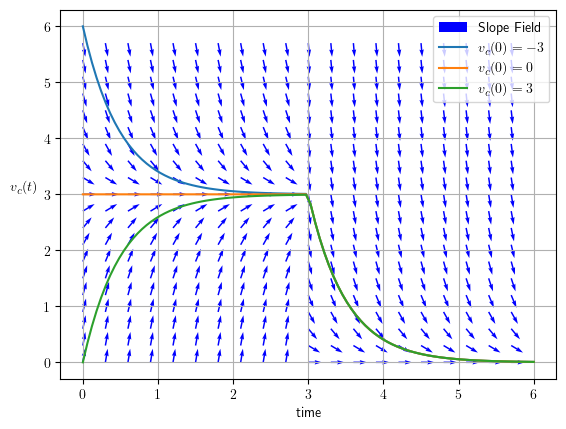

In [31]:
time=np.linspace(0,6,100)
v1=v[:int(v.shape[0]/2)]

dv1=voltage_capacitor(v1, 3, 0.5, 1)
dv2=voltage_capacitor(v1, 0, 0.5, 1)
dv=np.concatenate((dv1, dv2), axis=0)
dt=np.ones(dv.shape)
norm=np.sqrt(dv**2+dt**2)


plt.quiver(t, v, dt/norm, dv/norm, color='blue', label='Slope Field')
konst=[-3,0,3]

for i, k in enumerate(konst):
    plt.plot(time, [switch(time[i], 3, 0.5, 1, k) for i in range(len(time))], label=f'$v_c(0)={k}$')
plt.legend()
plt.grid()
plt.ylabel(r'$v_c(t)$', rotation=0, ha='right')
plt.xlabel(r'time')

### Results

As you can see it looks to be a smattering of both our equations earlier. Our function for the slope field has worked exceptionally well.